### Computational Guided Inquiry for PChem (Neshyba, 2021)


# Freezing Point Depression


## Introduction

The phrase *Freezing Point Depression* describes an effect in which a solvent, when it contains dissolved solutes, freezes at a lower temperature than the pure solvent would. Freezing point depression is the principle behind the salting of roads in winter, and the making of ice cream!

It turns out that freezing point depression is closely tied to another effect, namely the reduction in a solvent's equilibrium vapor pressure, $P_A$, due to the presence of dissolved solute $B$. This effect, called *Raoult's Law*, is described graphically in Figure 1.

<p style='text-align: center;'>
<img src="Freezing Point Depression.png" height="500" width="500"/>

__Figure 1__. Phase diagram of water showing the effect of Raoult's Law on the liquid-vapor phase boundary. 
</p>

Here, our goal is to put this relationship on a quantitative basis. To do that, we'll explore two methods: one we'll call the *Intersection Method*, and another known as *Blagden's Law*. 

### The Intersection Method for finding freezing point depression

We first define the mole fraction of solvent, $A$, in a soution containing solute $B$,

$$
\chi_A = \frac 1 {1 + M_A b_B} \ \ \ \ (1)
$$

where $b_B$ is $B$'s *molality* (typically expressed as $\frac {mol B}{kg A}$) and $M_A$ is the molar mass of the solvent ($\frac {kg A}{mol A}$). Then Raoult's Law says the new equilibrium pressure of solvent A, $P_A$ is related to the vapor pressure above pure solvent, $P_A^*$, according to

$$
P_A = P_A^*\chi_A \ \ \ \ (2)
$$

Since $\chi_A<1$, the dashed green line in Figure 1 lies below the solid green line. And where the dashed green line intersects with the solid-vapor equilibrium curve, that's the new freezing temperature! That means there's a freezing point reduction, $\Delta T_F$, indicated by an arrow in the figure. 

In this exercise, you'll be evaluating $\Delta T_F$ of water containing a hypothetical constant, which we're calling *B*, using this method. 

### Blagden's Law
It turns out the Intersection Method can be used to derive a simple analytical relationship, called *Blagden's Law*. We won't derive it here, we'll just quote the main results. First, each solvent has its own *cryoscopic constant*, designated here as $K_A$. While there are tables listing them, we'll focus on its theoretical value, given by

$$ 
K_A = \frac {R \times M \times T_f^2}{\Delta H_{fus}} \ \ \ \ (3)
$$

where $T_f$ is the normal freezing temperature of the solvent, and $\Delta H_{fus}$ is the enthalpy of fusion at that temperature. 

The second result is that the freezing point depression is given by the simple linear relationship

$$
\Delta T_F = -i K_A \times b \ \ \ \ (4)
$$

where $i$ is called the *van't Hoff factor*. There's a very interesting story behind *van't Hoff factor*, especially where it applies to ionic solutes like $NaCl$, but for our present purposes we'll just say $i=1$.


## Learning Objectives
- What Raoult's Law is, and how to use it
- How Raoult's Law allows one to predict freezing point depression
- How to predict a solvent's cryoscopic constant, $K_A$
- How to use Blagden's Law to predict freezing point depression

In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

In [2]:
# Gas constant in SI units
R = AssignQuantity(8.314,'J/mol/K'); print(R)

# Triple point of water
T3 = AssignQuantity(273.16,'K'); print(T3)
P3 = AssignQuantity(612,'Pa'); print(P3)

# Molar mass of water
M = AssignQuantity(18,'g/mol')

# Enthalpy of vap and sub
DHvap = AssignQuantity(44,'kJ/mol')
DHsub = AssignQuantity(50,'kJ/mol')

8.314 joule / kelvin / mole
273.16 kelvin
612 pascal


### Define an extended (supercooled or superheated) Clausius-Clapeyron function
The function below is provided for you and can be run as-is. But if you want to see a different amount of superheating or cooling in your graphs below, you can alter the first few lines to suit you.

In [3]:
def Clausius_Clapeyron_super(T,T3,P3,DH,R,AssignQuantity):
    """ This function calculates Clausius-Clapeyron curves past the triple point"""
    
    # The numbers here determine how much superheating or supercooling we want to see
    superheat = AssignQuantity(5,'K')
    supercool = AssignQuantity(5,'K')

    # Decide on whether we're superheating or supercooling, and extend appropriately
    if T < T3:
        print('Superheating ...')
        T_array = AssignQuantity(np.linspace(T,T3+superheat),T.units)
    else:
        print('Supercooling ...')
        T_array = AssignQuantity(np.linspace(T3-supercool,T),T.units)
    R.ito('J/mol/K')
    DH.ito('J/mol')
    P_array = P3*np.exp(-DH/R*(1/T_array-1/T3))
    print('Units of resulting temperature:', T_array.units)
    print('Units of resulting pressure:', P_array.units)

    # Return the temperature and pressure arrays
    return T_array, P_array

### Using the extended Clausius-Clapeyron equation
The first line below uses Clausius_Clapeyron_super to calculate $P_{H_2O,liq}^*$ *up* to 278 K. The temperature range starts a few degrees below $T_3$, because this is *super* Clausius-Clapeyron! 

Add another line that uses Clausius_Clapeyron_super to calculate $P_{H_2O,ice}^*$ *down* to 268 K. You can call the resulting arrays T_sv and P_sv, if you like.

In [4]:
# Call Clausius_Clapeyron for the liquid->vapor phase boundary, going up to 278 K.
T_lv, P_lv = Clausius_Clapeyron_super(AssignQuantity(278,'K'),T3,P3,DHvap,R,AssignQuantity)

# Call Clausius_Clapeyron for the solid->vapor phase boundary, going down to 268 K.
### BEGIN SOLUTION
T_sv, P_sv = Clausius_Clapeyron_super(AssignQuantity(268,'K'),T3,P3,DHsub,R,AssignQuantity)
### END SOLUTION

Supercooling ...
Units of resulting temperature: kelvin
Units of resulting pressure: pascal
Superheating ...
Units of resulting temperature: kelvin
Units of resulting pressure: pascal


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:591: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


### Plotting the results
Plot these two pressures ($P_{H_2O,liq}^*$ and $P_{H_2O,ice}^*$), with appropriate legends. Our coloring convention is green for liquid->vapor, orange for solid->vapor. 

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


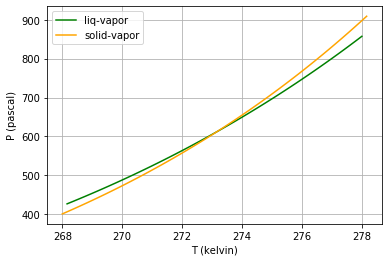

In [5]:
# Plot the solid->vapor, liquid->vapor phase boundaries
### BEGIN SOLUTION
plt.figure()
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.plot(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()
### END SOLUTION

### Pause for analysis
Using the zoom feature, double-check that the intersection really does occur at water's triple point, $T_3=273.16 \ K$ and $P_3 = 612 \ Pa$. 

### Applying Raoult's Law to the liquid->vapor pressure

Some key ideas:
- The units of molality, $b$, are moles (of solute B) divided by kg (of solvent, in this case water).
- You can convert from molality to mole fraction using
$$
\chi_{H_2O} = \frac 1 {1+M_{H_2O} b_B}
$$


- Applying Raoult's Law to a solution consists of computing a new pressure, $P_{H_2O}=\chi_{H_2O} \times P_{H_2O}^*$, which of course will be smaller than $P_{H_2O}^*$ because $\chi_{H_2O} < 1$.

where we've added subscripts to remind ourselves that ${H_2O}$ is the solvent and B is a solute.

Once you have $\chi_{H_2O}$, plot the pressure of the two phase boundaries you got previously, but add on the Raoult-corrected pressure too, with appropriate legends. Use a dashed line for the Raoult result, something like

    plt.plot(T_lv,P_lv*chiH2O,color='green',label='liq-vapor',linestyle='dashed')


0.9910802775024778 dimensionless


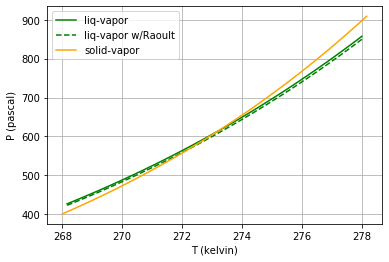

In [6]:
# Assign a value of 0.5 mol/kg to b, and use it to calculate the mole fraction of water in this solution 
### BEGIN SOLUTION
b = AssignQuantity(0.5,'mol/kg')
chiH2O = 1/(1+M*b); print(chiH2O)
### END SOLUTION

# Plot the solid->vapor, liquid->vapor, and Raoult-corrected liquid-> vapor phase boundaries
### BEGIN SOLUTION
plt.figure()
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.plot(T_lv,P_lv*chiH2O,color='green',label='liq-vapor w/Raoult',linestyle='dashed')
plt.plot(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()
### END SOLUTION

### Using the phase diagram method
1. Using the zoom feature, figure out the reduction in the freezing temperature, and record your results in spreadsheet. 
1. Run the whole notebook again a few more times, with increasing concentrations of solute b, and record your results. You probably don't want to get much above $b_B=2 {\ mol \over kg}$, or else you'll have to expand the limits of your graph.
1. Once you're happy with your data set, use a trendline analysis in your spreadsheet to get the slope (assuming the form given in Eq. (4), assuming $i=1$). 
1. In the cell below, report the value of $K_A$ you get using this method, with appropriate units. 

My value: 1.85 kg K / mol

### Using Blagden's Law

In the cell below,
1. Calculate the value of $K_A$ using Eq. (3). You can use $\Delta H_{fus}=6 \ kJ/mol$ and a freezing temperature of $273 \ K$. Report your result in units kg K /mol, and comment on how well it compares to the value of $K_A$ you got in the previous cell.
1. Use Blagden's Law, Eq. (4), to predict the freezing point depression of water in a saturated sodium chloride solution, for which $b=6.2 \ mol/kg$. In this case, the van't Hoff factor is $i=2$.

In [7]:
# BEGIN SOLUTION
T_f = AssignQuantity(273,'K'); print(T_f)
DHfus = AssignQuantity(6,'kJ/mol'); print(DHfus)
K_A = R * M * T_f**2/DHfus; print(K_A)
K_A.ito('kg K /mol'); print(K_A)
print(K_A)

b = AssignQuantity(360,'g/kg')/AssignQuantity(58,'g/mol'); print(b)
i = 2
DT = i*K_A*b; print(DT)

### END SOLUTION

273 kelvin
6 kilojoule / mole
1858902.318 gram * joule * kelvin / kilojoule / mole
1.858902318 kelvin * kilogram / mole
1.858902318 kelvin * kilogram / mole
6.206896551724138 mole / kilogram
23.076028775172414 kelvin
